# Pattern Recognition and Machine Learning
## Week 4 Tutorial

In [1]:
import pandas as pd

## 3 Diabetes Data Analysis
### 3.1 Import and Loading dataset

In [2]:
# load dataset
diabete_dataset = pd.read_csv("data/diabetes.csv", sep=",")

In [3]:
diabete_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
diabete_dataset.shape

(768, 9)

### 3.2 Explore the data

In [5]:
diabete_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 3.3 Further analysis

In [6]:
diabete_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


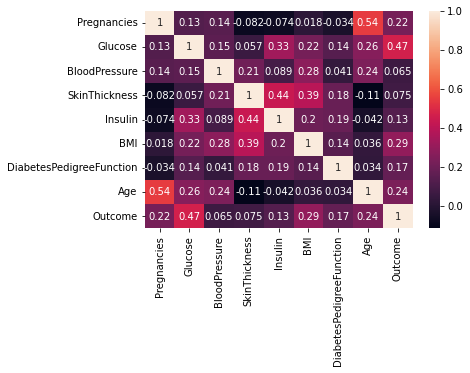

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(diabete_dataset.corr(), annot=True)
plt.show()

## 4 Diabetes Classification from Logistic Regression
### 4.1 Feature extraction

In [8]:
# Extract features and a target
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = diabete_dataset[feature_columns] # features
y = diabete_dataset['Outcome'] # target

In [9]:
print("Feature: " + str(X.shape))
print("Target: " + str(y.shape))

Feature: (768, 8)
Target: (768,)


### 4.1 Splitting the dataset

In [10]:
# split X and y into training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                               test_size=0.25,
                                               random_state=1)

In [11]:
X_train.shape

(576, 8)

### 4.3 Build a Logistic Regression model and make a prediction

In [12]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(C = 10, max_iter=5000)

In [13]:
lgr.fit(X_train, y_train)

result = lgr.predict(X_test)

### 4.4 Model Evalation using Confusion Matrix

In [14]:
from sklearn import metrics
from sklearn.metrics import classification_report

conf_matrix = metrics.confusion_matrix(y_test, result)
print(conf_matrix)

[[109  14]
 [ 29  40]]


In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, result))
print("Precision:",metrics.precision_score(y_test, result,
                                           average = 'weighted'))
print("Recall:",metrics.recall_score(y_test, result,
                                     average = 'weighted'))
print("F1-score:",metrics.f1_score(y_test, result,
                                   average = 'weighted'))

Accuracy: 0.7760416666666666
Precision: 0.7722046095008052
Recall: 0.7760416666666666
F1-score: 0.7688212550228949


### 4.5 ROC Curve

In [16]:
fpr, tpr, _ = metrics.roc_curve(y_test, result)
auc = metrics.roc_auc_score(y_test, result)

auc

0.732944503358077

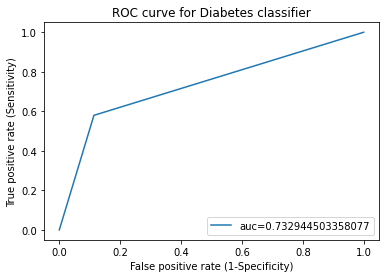

In [17]:
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.title("ROC curve for Diabetes classifier")
plt.xlabel("False positive rate (1-Specificity)")
plt.ylabel("True positive rate (Sensitivity)")
plt.legend(loc=4)
plt.show()

In [18]:
# Display Misclassified rows with Predicted Labels
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, result):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

In [19]:
import numpy as np

np.array(misclassifiedIndexes).T

array([ 16,  20,  21,  23,  29,  30,  39,  43,  49,  58,  60,  64,  66,
        67,  68,  71,  72,  75,  82,  83,  85, 107, 108, 110, 114, 117,
       119, 122, 127, 128, 132, 137, 138, 145, 148, 164, 166, 168, 169,
       180, 181, 187, 188])

### 4.6 Find C to maximum the F1-score

In [20]:
def linear_regression(c):
    lgr = LogisticRegression(C = c, max_iter=5000)
    fit_lgr = lgr.fit(X_train, y_train)
    predicted_lgr = fit_lgr.predict(X_test)
    cm_lgr = metrics.confusion_matrix(y_test, predicted_lgr)
    
    f1_sc = metrics.f1_score(y_test, predicted_lgr, average = 'weighted')
    return f1_sc

In [21]:
c = 0.0001
c_values = []
f1_values = []

while c < 1000:
    f1_sc = linear_regression(c)
    c_values.append(c)
    f1_values.append(f1_sc)
    c = c*10

f1_lgr = pd.DataFrame({
    "c": c_values,
    "f1": f1_values
})

In [22]:
f1_lgr[f1_lgr['f1'] == f1_lgr['f1'].max()].c

2      0.01
3      0.10
4      1.00
5     10.00
6    100.00
Name: c, dtype: float64

In [23]:
f1_lgr.sort_values('f1', ascending=False)

,c,f1
2,0.0100,0.768821
3,0.1000,0.768821
4,1.0000,0.768821
5,10.0000,0.768821
6,100.0000,0.768821
1,0.0010,0.767547
0,0.0001,0.758508
